# Practice: Handling Missing Data
Aug 19, 2019<br>
Ngoc Tran<br>
(Inspired by: https://www.kaggle.com/dansbecker/handling-missing-values)

------------------------------------

## Import

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings

from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

Change directory to get source code:

In [2]:
main_path = os.getcwd()
parent_path = Path(os.getcwd()).parent
src_path = str(parent_path) + "/src/directories"
os.chdir(src_path)

More import:

In [3]:
import change_directory

Change back to notebook directory:

In [4]:
os.chdir(main_path)

## Load data

Change directory to get data:

In [5]:
cd = change_directory.ChangeDirectory()

In [6]:
cd.change_to_data_dir()

Load data:

In [7]:
ih_1 = pd.read_csv("Iowa_Housing_1.csv")
ih_2 = pd.read_csv("Iowa_Housing_2.csv")
ih = pd.concat([ih_1, ih_2]).reset_index(drop=True)

Change back to notebook directory:

In [8]:
cd.change_to_notebook_dir()

## Explore data

Quick look:

In [9]:
ih.shape

(2919, 81)

In [10]:
ih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2454 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

For the sake of simplicity, we use only numeric predictors.

In [11]:
ih = ih.select_dtypes(exclude=["object"])

In [12]:
ih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 38 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
LotFrontage      2454 non-null float64
LotArea          2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
MasVnrArea       2896 non-null float64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtUnfSF        2918 non-null float64
TotalBsmtSF      2918 non-null float64
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
LowQualFinSF     2919 non-null int64
GrLivArea        2919 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
FullBath         2919 non-null int64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null int64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-

In [13]:
ih.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


Duplicates?

In [14]:
len(ih[ih.duplicated()])

0

How many rows have missing values per column?

In [15]:
ih.isna().sum().sort_values(ascending=False)

LotFrontage      465
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
LotArea            0
GrLivArea          0
MSSubClass         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
SalePrice          0
YrSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Id                 0
dtype: int64

We don't need the Id column.

In [16]:
ih.drop(["Id"], axis=1, inplace=True)

Let's set 500 rows (with no missing values) aside for our test set.

In [17]:
rows_no_missing_values = ih[~ih.isna().any(axis=1)].reset_index(drop=True)

In [18]:
rows_no_missing_values_randomized = rows_no_missing_values.sample(len(rows_no_missing_values),
                                                                  random_state=123)

In [19]:
test = rows_no_missing_values_randomized[:500].reset_index(drop=True)

Our training set includes all of the other rows.

In [20]:
rows_missing_values = ih[ih.isna().any(axis=1)].reset_index(drop=True)

In [21]:
training = pd.concat([rows_missing_values, rows_no_missing_values_randomized[500:]]).reset_index(drop=True)

Which columns have missing values?

In [24]:
training.columns[training.isna().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

### LotFrontage

In [35]:
ih.LotFrontage.describe()

count    2454.000000
mean       68.712714
std        24.105764
min         0.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

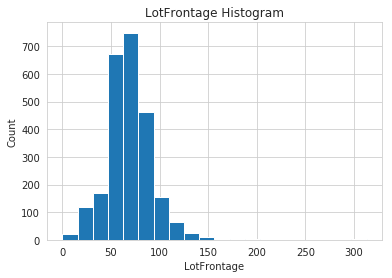

In [36]:
ih.LotFrontage.hist(bins=20);
plt.title("LotFrontage Histogram");
plt.xlabel("LotFrontage");
plt.ylabel("Count");

### MasVnrArea

In [37]:
ih.MasVnrArea.describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

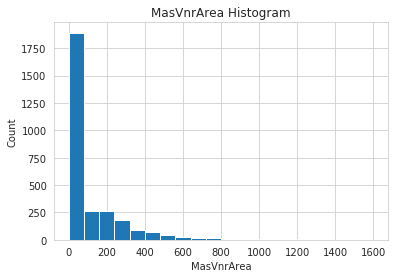

In [41]:
ih.MasVnrArea.hist(bins=20);
plt.title("MasVnrArea Histogram");
plt.xlabel("MasVnrArea");
plt.ylabel("Count");

### BsmtFinSF1

In [43]:
ih.BsmtFinSF1.describe()

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

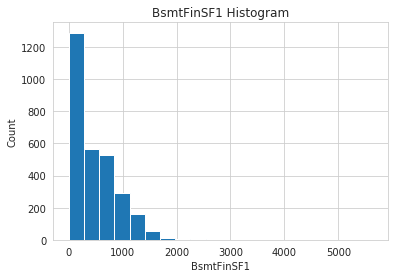

In [42]:
ih.BsmtFinSF1.hist(bins=20);
plt.title("BsmtFinSF1 Histogram");
plt.xlabel("BsmtFinSF1");
plt.ylabel("Count");

### BsmtFinSF2

In [44]:
ih.BsmtFinSF2.describe()

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

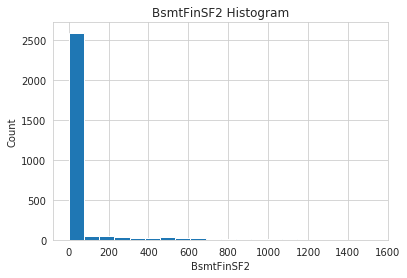

In [45]:
ih.BsmtFinSF2.hist(bins=20);
plt.title("BsmtFinSF2 Histogram");
plt.xlabel("BsmtFinSF2");
plt.ylabel("Count");

## Techniques to treat missing values:

### Drop Rows with Missing Values

### Drop Columns with Missing Values

### Imputation (Averaging Techniques)

### An Extension To Imputation (Averaging Techniques)

### Imputation (Predictive Techniques)

### An Extension To Imputation (Predictive Techniques)